<a href="https://colab.research.google.com/github/drbarak/DS_Project1/blob/GUI/Classification_Project_Shufersal_Cans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classification Project

for Shufersal on-line orders, for replacing of missing products, will predict the replacement success!

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import display
p = print
d = display

# Get Data

## Raw Data

To run the raw section, one must load Sweets_ver2.csv to local google drive and change the next line to True

In [ ]:
id = ''  # name of result file

RAW = True
DIFF = True
RATIO = False
REL = False

In [ ]:
def get_raw(fname):
  data_url = 'https://github.com/DanielKorenDataScience/ClassificationProject/blob/main/' + fname + '.csv?raw=true'
  resp = requests.get(data_url)
  text = resp.text
  
  with open(fname + '.csv', 'w') as fh:
    fh.write(text)

In [ ]:
if RAW and False:
  get_raw('Canned')

In [ ]:
if RAW and False:
  df1 = pd.read_csv('Canned.csv', nrows=1) # , encoding='ISO-8859-8'
  df2 = pd.read_csv('Canned.csv', usecols=[i for i in range(82) if not i in[0,8,10,12,14,16,18,20,24,26,27,48,50,52,54,56,58,62,64,65]])

In [ ]:
for enc in ['ISO-8859-8', 'ISO-8859-9','ISO-8859-10','ISO-8859-11', 'ISO-8859-13', 'ISO-8859-14','UTF-8', 'IEC 8859-8', 'ISO-8859-8-E', 'ISO-8859-8-I', 'Windows-1255', 'SI1311:2002', 'ECMA-121']:
  try:
    df1 = pd.read_csv('Canned.csv', nrows=1, encoding=enc)
    p(enc)
    d(df1)
  except:
    p('error ', enc)

error  ISO-8859-8
ISO-8859-9


,<!DOCTYPE html>
0,"<html lang=""en"" data-color-mode=""auto"" data-li..."


ISO-8859-10


,<!DOCTYPE html>
0,"<html lang=""en"" data-color-mode=""auto"" data-li..."


ISO-8859-11


,<!DOCTYPE html>
0,"<html lang=""en"" data-color-mode=""auto"" data-li..."


ISO-8859-13


,<!DOCTYPE html>
0,"<html lang=""en"" data-color-mode=""auto"" data-li..."


ISO-8859-14


,<!DOCTYPE html>
0,"<html lang=""en"" data-color-mode=""auto"" data-li..."


UTF-8


,<!DOCTYPE html>
0,"<html lang=""en"" data-color-mode=""auto"" data-li..."


error  IEC 8859-8
error  ISO-8859-8-E
error  ISO-8859-8-I
Windows-1255


,<!DOCTYPE html>
0,"<html lang=""en"" data-color-mode=""auto"" data-li..."


error  SI1311:2002
error  ECMA-121


### After download from github to local drive, then upload to google drive - can read hebrew

In [ ]:
if RAW:
  df_cans = pd.read_csv('/content/drive/MyDrive/Cans.csv', nrows=1, encoding='ISO-8859-8')
  d(df_cans)

,OrderNumbert,HouseHoldID,LocationCityName,QuarterNumber,MonthNumber,WeekNumber,DayNumberInWeek,PeriodHoliday,TransactionDate,DepartmentCode,DepartmentName,CategoryCode,CategoryName,GroupCode,GroupName,SubGroupCode,SubGroupName,CompoundID,CompoundIDDesc,ParentProductNumber,ProductDescription,BrandIndDesc,BrandName,VendorNumber,VendorName,UnitOfMeasure,ItemsPerPackageWH,DescriptionTavit,Price,Quantity,cntPrdAll,NetSaleAmountAll,NetSaleNoVatPrdLast3Months,QuantSale,cntMonths,DiscountPerUnit,isPromo,Energy,Pachmema,Natran,...,ShumanRavuy,ShumanTrans,Colastrol,SivimTzunatim,CafiotSucar,DepartmentCodeSubs,DepartmentNameSusb,CategoryCodeSubs,CategoryNameSubs,GroupCodeSubs,GroupNameSubs,SubGroupCodeSubs,SubGroupNameSubs,CompoundIDSubs,CompoundIDDescSubs,ProductNumberSubs,ProductDescriptionSubs,BrandIndDescSuss,BrandNameSubs,VendorNumberSubs,VendorNameSubs,UnitOfMeasureSubs,ItemsPerPackageWHSubs,DescriptionTavitSubs,PriceSubs,NetSaleNoVatPrdSubs,QuantSaleSubs,cntMonthsSubs,DiscountPerUnitSubs,EnergySubs,PachmemaSubs,NatranSubs,HelbonSubs,ShumanSubs,ShumanRavuySubs,ShumanTransSubs,ColastrolSubs,SivimTzunatimSubs,CafiotSucarSusb,CorrelateItemStatusCode
0,5499,1,תל אביב,202101,202103,202110,4,NotHoliday,10/03/2021,10,10-מזון יבש,1,שימורים,640,מוצרי עגבניות,4,עגבניות מרוסקות,-8.005110e+12,עגבניות חתוכות דק 3*400ג,8.005110e+12,עגבניות חתוכות דק 3*400ג,MUTTI,לא מותג פרטי,913847,"רסטרטו יבוא ושיווק בע""מ",1.2,8,3 * 400 גרם,10,2,46,879.75,1148095.31,0.2,16,6.89,PromoSusbDiffPromo,26,3.9,120,...,NaN,NaN,NaN,NaN,NaN,10,10-מזון יבש,1,שימורים,640,מוצרי עגבניות,4,עגבניות מרוסקות,-7.296070e+12,עגבניות חתוכות דק 3*400ג,7.296070e+12,עגבניות חתוכות דק 3*400ג,שופרסל,מותג פרטי,921174,הדס 1987 בעמ P.L פרי ניר,1.2,8,3 * 400 גרם,10,118719.7,0.6,8,NaN,26,4.2,114,1.6,NaN,NaN,NaN,NaN,1.5,0.75,1


In [ ]:
def diff_list(li1, li2):
  p(len(li1), len(li2))
  return [i for i in li1 + li2 if i not in li1 or i not in li2]

### Cans dataset identical features as Sweets - the diff list returns empty list

In [ ]:
if RAW:
  df1 = pd.read_csv('/content/drive/MyDrive/Cans.csv', nrows=1, encoding='ISO-8859-8')
  df2 = pd.read_csv('/content/drive/MyDrive/Cans.csv', encoding='ISO-8859-8', usecols=[i for i in range(82) if not i in[0,8,10,12,14,16,18,20,24,26,27,48,50,52,54,56,58,62,64,65]])

In [ ]:
if RAW:
  df_sweet = pd.read_csv('/content/drive/MyDrive/Sweets_ver2.csv', encoding='ISO-8859-8', nrows=1)
  d(diff_list(list(df1.columns), list(df_sweet.columns)))

82 82


[]

In [ ]:
if RAW:
  df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 82 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   OrderNumbert                1 non-null      int64  
 1   HouseHoldID                 1 non-null      int64  
 2   LocationCityName            1 non-null      object 
 3   QuarterNumber               1 non-null      int64  
 4   MonthNumber                 1 non-null      int64  
 5   WeekNumber                  1 non-null      int64  
 6   DayNumberInWeek             1 non-null      int64  
 7   PeriodHoliday               1 non-null      object 
 8   TransactionDate             1 non-null      object 
 9   DepartmentCode              1 non-null      int64  
 10  DepartmentName              1 non-null      object 
 11  CategoryCode                1 non-null      int64  
 12  CategoryName                1 non-null      object 
 13  GroupCode                   1 non-null 

Eliminating unwanted columns - mostly descriptive columns

In [ ]:
if RAW:
  d(diff_list(list(df1.columns), list(df2.columns)))

82 62


['OrderNumbert',
 'TransactionDate',
 'DepartmentName',
 'CategoryName',
 'GroupName',
 'SubGroupName',
 'CompoundIDDesc',
 'ProductDescription',
 'VendorName',
 'ItemsPerPackageWH',
 'DescriptionTavit',
 'DepartmentNameSusb',
 'CategoryNameSubs',
 'GroupNameSubs',
 'SubGroupNameSubs',
 'CompoundIDDescSubs',
 'ProductDescriptionSubs',
 'VendorNameSubs',
 'ItemsPerPackageWHSubs',
 'DescriptionTavitSubs']

In [ ]:
if RAW:
  d(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37912 entries, 0 to 37911
Data columns (total 62 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   HouseHoldID                 37912 non-null  int64  
 1   LocationCityName            37904 non-null  object 
 2   QuarterNumber               37912 non-null  int64  
 3   MonthNumber                 37912 non-null  int64  
 4   WeekNumber                  37912 non-null  int64  
 5   DayNumberInWeek             37912 non-null  int64  
 6   PeriodHoliday               37912 non-null  object 
 7   DepartmentCode              37912 non-null  int64  
 8   CategoryCode                37912 non-null  int64  
 9   GroupCode                   37912 non-null  int64  
 10  SubGroupCode                37912 non-null  int64  
 11  CompoundID                  37912 non-null  float64
 12  ParentProductNumber         37912 non-null  float64
 13  BrandIndDesc                379

None

In [ ]:
# Fix Typo mistake
if RAW: 
  df2.rename(columns={'OrderNumbert': 'OrderNumber','BrandIndDescSuss': 'BrandIndDescSubs', 'ProductNumberSubs': 'ParentProductNumberSubs', 
                    'NetSaleNoVatPrdSubs': 'NetSaleNoVatPrdLast3MonthsSubs', 'CafiotSucarSusb': 'CafiotSucarSubs'}, inplace=True)

Eliminating nulls

In [ ]:
# Fill na
if RAW:
  df2.fillna({'QuantSale': 1, 'QuantSaleSubs': 1}, inplace=True)
  df2.fillna(0, inplace=True)
  d(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37912 entries, 0 to 37911
Data columns (total 62 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   HouseHoldID                     37912 non-null  int64  
 1   LocationCityName                37912 non-null  object 
 2   QuarterNumber                   37912 non-null  int64  
 3   MonthNumber                     37912 non-null  int64  
 4   WeekNumber                      37912 non-null  int64  
 5   DayNumberInWeek                 37912 non-null  int64  
 6   PeriodHoliday                   37912 non-null  object 
 7   DepartmentCode                  37912 non-null  int64  
 8   CategoryCode                    37912 non-null  int64  
 9   GroupCode                       37912 non-null  int64  
 10  SubGroupCode                    37912 non-null  int64  
 11  CompoundID                      37912 non-null  float64
 12  ParentProductNumber             

None

In [ ]:
if RAW:
  df2.to_csv("Shufersal_cans.csv", index = False)
  p(df2.shape)

(37912, 62)


In [ ]:
if RAW:
  df = pd.read_csv('Shufersal_cans.csv', index_col=False)
  p(df.shape)

(37912, 62)


## Encoding categories

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

if RAW:
  enc.fit(['PromoSusbDiffPromo', 'PromoSusbSamePromo', 'noPromo'])
  p(df.isPromo.value_counts())
  p()
  df.isPromo = enc.transform(df.isPromo)
  p(df.isPromo.value_counts())

noPromo               19746
PromoSusbDiffPromo    18059
PromoSusbSamePromo      107
Name: isPromo, dtype: int64

2    19746
0    18059
1      107
Name: isPromo, dtype: int64


In [ ]:
if RAW:
  for col in ['LocationCityName', 'PeriodHoliday', 'BrandIndDesc', 'BrandName', 'BrandIndDescSubs', 'BrandNameSubs']:
    p(col)
    p(pd.DataFrame(df[col].value_counts()).index)
    df[col] = enc.fit_transform(df[col])
    p(pd.DataFrame(df[col].value_counts()).index)

LocationCityName
Index(['ראשון לציון', 'תל אביב', 'רחובות', 'כפר סבא', 'חיפה', 'רעננה',
       'פתח תקוה', 'ירושלים', 'נס ציונה', 'ראש העין', 'רמת גן', 'נתניה',
       'חולון', 'רמת השרון', 'אילת', 'יהוד', 'אשקלון', 'מודיעין', 'גבעתיים',
       'הוד השרון', 'באר יעקב', 'עפולה', 'קרית מוצקין', 'שוהם', 'הרצליה',
       'כרמיאל', 'חדרה', 'רמת אביב א', 'חריש', 'זכרון יעקב', 'טירת הכרמל',
       'קרית שמונה', 'בת ים', 'בנימינה', 'מזכרת בתיה', 'קרית ביאליק', 'יבנה',
       'צור-יגאל', 'עמק חפר', 'ערד', 'קצרין', 'בני ברק', 'פרדסיה', 'תל מונד',
       'משמר השרון', 'ירוחם', 'קרית אתא', 'קרית עקרון', 'פרדס חנה', 'רמלה',
       'נהריה', 'מגדל העמק', 'אשדוד', 'מעלה אדומים', 'בית שאן', 'אור עקיבא',
       'חצור-הגלילית', 'גבעת עדה', 'באר טוביה', 'כפר תבור', 'גבעת אולגה',
       'שדרות', 'בת חפר', 'קרית גת', 'כרכור', 'באר שבע', 'מפרץ חיפה',
       'גבעת שמואל', 'בית-שמש', 'צור משה', 'נשר', 'אריאל', 'גדרה', 'אופקים',
       'קרית חיים', 'מבשרת ציון', 'טבריה', 'צפת', '0', 'צורן קדימה', 'שילת',
      

## Combine 'GroupCode' and 'SubGroupCode' into one column

In [ ]:
if RAW:
  d(df.head(2))
  df.SubGroupCode = df.GroupCode * 10 + df.SubGroupCode
  df.SubGroupCodeSubs = df.GroupCodeSubs * 10 + df.SubGroupCodeSubs
#  df.drop(['SubGroupCode', 'SubGroupCodeSubs'], axis=1, inplace=True)
  d(df.head(2))

,HouseHoldID,LocationCityName,QuarterNumber,MonthNumber,WeekNumber,DayNumberInWeek,PeriodHoliday,DepartmentCode,CategoryCode,GroupCode,SubGroupCode,CompoundID,ParentProductNumber,BrandIndDesc,BrandName,VendorNumber,UnitOfMeasure,Price,Quantity,cntPrdAll,NetSaleAmountAll,NetSaleNoVatPrdLast3Months,QuantSale,cntMonths,DiscountPerUnit,isPromo,Energy,Pachmema,Natran,Helbon,Shuman,ShumanRavuy,ShumanTrans,Colastrol,SivimTzunatim,CafiotSucar,DepartmentCodeSubs,CategoryCodeSubs,GroupCodeSubs,SubGroupCodeSubs,CompoundIDSubs,ParentProductNumberSubs,BrandIndDescSubs,BrandNameSubs,VendorNumberSubs,UnitOfMeasureSubs,PriceSubs,NetSaleNoVatPrdLast3MonthsSubs,QuantSaleSubs,cntMonthsSubs,DiscountPerUnitSubs,EnergySubs,PachmemaSubs,NatranSubs,HelbonSubs,ShumanSubs,ShumanRavuySubs,ShumanTransSubs,ColastrolSubs,SivimTzunatimSubs,CafiotSucarSubs,CorrelateItemStatusCode
0,1,97,202101,202103,202110,4,1,10,1,640,4,-8.005110e+12,8.005110e+12,2,0,913847,1.20,10.0,2,46,879.75,1148095.31,0.2,16,6.89,0,26.0,3.9,120.0,1.2,0.2,0.0,0.0,0.0,0.0,0.0,10,1,640,4,-7.296070e+12,7.296070e+12,61,1,921174.0,1.20,10.0,118719.70,0.6,8,0.0,26.0,4.2,114.0,1.6,0.0,0.0,0.0,0.0,1.5,0.75,1
1,2,87,202101,202103,202112,5,0,10,1,703,4,-4.165017e+06,4.165017e+06,16,0,921279,0.56,5.9,1,42,618.73,16230.05,1.0,16,0.00,2,43.0,10.0,15.0,0.2,0.2,0.0,0.0,0.0,1.2,0.0,10,1,703,4,1.401100e+04,2.881216e+06,64,0,921169.0,0.72,10.0,21056.56,1.0,16,0.0,51.0,11.5,0.0,0.0,0.0,0.0,0.0,0.0,1.4,2.50,1


,HouseHoldID,LocationCityName,QuarterNumber,MonthNumber,WeekNumber,DayNumberInWeek,PeriodHoliday,DepartmentCode,CategoryCode,GroupCode,SubGroupCode,CompoundID,ParentProductNumber,BrandIndDesc,BrandName,VendorNumber,UnitOfMeasure,Price,Quantity,cntPrdAll,NetSaleAmountAll,NetSaleNoVatPrdLast3Months,QuantSale,cntMonths,DiscountPerUnit,isPromo,Energy,Pachmema,Natran,Helbon,Shuman,ShumanRavuy,ShumanTrans,Colastrol,SivimTzunatim,CafiotSucar,DepartmentCodeSubs,CategoryCodeSubs,GroupCodeSubs,SubGroupCodeSubs,CompoundIDSubs,ParentProductNumberSubs,BrandIndDescSubs,BrandNameSubs,VendorNumberSubs,UnitOfMeasureSubs,PriceSubs,NetSaleNoVatPrdLast3MonthsSubs,QuantSaleSubs,cntMonthsSubs,DiscountPerUnitSubs,EnergySubs,PachmemaSubs,NatranSubs,HelbonSubs,ShumanSubs,ShumanRavuySubs,ShumanTransSubs,ColastrolSubs,SivimTzunatimSubs,CafiotSucarSubs,CorrelateItemStatusCode
0,1,97,202101,202103,202110,4,1,10,1,640,6404,-8.005110e+12,8.005110e+12,2,0,913847,1.20,10.0,2,46,879.75,1148095.31,0.2,16,6.89,0,26.0,3.9,120.0,1.2,0.2,0.0,0.0,0.0,0.0,0.0,10,1,640,6404,-7.296070e+12,7.296070e+12,61,1,921174.0,1.20,10.0,118719.70,0.6,8,0.0,26.0,4.2,114.0,1.6,0.0,0.0,0.0,0.0,1.5,0.75,1
1,2,87,202101,202103,202112,5,0,10,1,703,7034,-4.165017e+06,4.165017e+06,16,0,921279,0.56,5.9,1,42,618.73,16230.05,1.0,16,0.00,2,43.0,10.0,15.0,0.2,0.2,0.0,0.0,0.0,1.2,0.0,10,1,703,7034,1.401100e+04,2.881216e+06,64,0,921169.0,0.72,10.0,21056.56,1.0,16,0.0,51.0,11.5,0.0,0.0,0.0,0.0,0.0,0.0,1.4,2.50,1


## Use Dummies

Minimal improvement - FalseNegative (0,0) improved from 1338 to 1328

In [ ]:
## Converting the categories column (isPromo) to dummies column 
if RAW:
  p(df.shape)
  df = pd.get_dummies(df, columns=['isPromo', 'PeriodHoliday'])
  p(df.shape)

(37912, 62)
(37912, 65)


In [ ]:
if RAW:
  df_t = df.copy()

## Calc diff vector

In [ ]:
if RAW:
  p(df.columns)

Index(['HouseHoldID', 'LocationCityName', 'QuarterNumber', 'MonthNumber',
       'WeekNumber', 'DayNumberInWeek', 'DepartmentCode', 'CategoryCode',
       'GroupCode', 'SubGroupCode', 'CompoundID', 'ParentProductNumber',
       'BrandIndDesc', 'BrandName', 'VendorNumber', 'UnitOfMeasure', 'Price',
       'Quantity', 'cntPrdAll', 'NetSaleAmountAll',
       'NetSaleNoVatPrdLast3Months', 'QuantSale', 'cntMonths',
       'DiscountPerUnit', 'Energy', 'Pachmema', 'Natran', 'Helbon', 'Shuman',
       'ShumanRavuy', 'ShumanTrans', 'Colastrol', 'SivimTzunatim',
       'CafiotSucar', 'DepartmentCodeSubs', 'CategoryCodeSubs',
       'GroupCodeSubs', 'SubGroupCodeSubs', 'CompoundIDSubs',
       'ParentProductNumberSubs', 'BrandIndDescSubs', 'BrandNameSubs',
       'VendorNumberSubs', 'UnitOfMeasureSubs', 'PriceSubs',
       'NetSaleNoVatPrdLast3MonthsSubs', 'QuantSaleSubs', 'cntMonthsSubs',
       'DiscountPerUnitSubs', 'EnergySubs', 'PachmemaSubs', 'NatranSubs',
       'HelbonSubs', 'ShumanSubs',

In [ ]:
if RAW and DIFF:
  for col in ['DepartmentCode', 'CategoryCode', 'GroupCode', #'SubGroupCode',
       'CompoundID', 'ParentProductNumber', 'BrandIndDesc',
       'VendorNumber', 'UnitOfMeasure', 'Price', 'NetSaleNoVatPrdLast3Months', 'Energy', 'Pachmema',
       'Natran', 'Helbon', 'Shuman', 'ShumanRavuy', 'ShumanTrans', 'Colastrol',
       'SivimTzunatim', 'CafiotSucar', 'QuantSale', 'cntMonths', 'DiscountPerUnit']:
    df[col + 'Diff'] = df[col] - df[col + 'Subs']

In [ ]:
if RAW and DIFF:
  for col in ['DepartmentCode', 'CategoryCode', 'GroupCode', #'SubGroupCode',
       'CompoundID', 'ParentProductNumber', 'VendorNumber', 'BrandIndDesc']:
    df[col + 'Diff'] = (df[col + 'Diff'] != 0)    # tested both ==0 and !=0 (the result is 1 for one and 0 for the other - no change in the model results)
    df[col + 'Diff'] = enc.fit_transform(df[col + 'Diff'])

In [ ]:
if RAW and DIFF:
  df.to_csv("Shufersal_cans_with_diff.csv", index = False)

In [ ]:
if RAW and DIFF:
  df = pd.read_csv('Shufersal_cans_with_diff.csv', index_col=False)
  p(df.shape)

(37912, 88)


# Get ready Data

In [ ]:
if RAW:
  p(df.shape)
  d(df.head())

(37912, 88)


,HouseHoldID,LocationCityName,QuarterNumber,MonthNumber,WeekNumber,DayNumberInWeek,DepartmentCode,CategoryCode,GroupCode,SubGroupCode,CompoundID,ParentProductNumber,BrandIndDesc,BrandName,VendorNumber,UnitOfMeasure,Price,Quantity,cntPrdAll,NetSaleAmountAll,NetSaleNoVatPrdLast3Months,QuantSale,cntMonths,DiscountPerUnit,Energy,Pachmema,Natran,Helbon,Shuman,ShumanRavuy,ShumanTrans,Colastrol,SivimTzunatim,CafiotSucar,DepartmentCodeSubs,CategoryCodeSubs,GroupCodeSubs,SubGroupCodeSubs,CompoundIDSubs,ParentProductNumberSubs,...,DiscountPerUnitSubs,EnergySubs,PachmemaSubs,NatranSubs,HelbonSubs,ShumanSubs,ShumanRavuySubs,ShumanTransSubs,ColastrolSubs,SivimTzunatimSubs,CafiotSucarSubs,CorrelateItemStatusCode,isPromo_0,isPromo_1,isPromo_2,PeriodHoliday_0,PeriodHoliday_1,DepartmentCodeDiff,CategoryCodeDiff,GroupCodeDiff,CompoundIDDiff,ParentProductNumberDiff,BrandIndDescDiff,VendorNumberDiff,UnitOfMeasureDiff,PriceDiff,NetSaleNoVatPrdLast3MonthsDiff,EnergyDiff,PachmemaDiff,NatranDiff,HelbonDiff,ShumanDiff,ShumanRavuyDiff,ShumanTransDiff,ColastrolDiff,SivimTzunatimDiff,CafiotSucarDiff,QuantSaleDiff,cntMonthsDiff,DiscountPerUnitDiff
0,1,97,202101,202103,202110,4,10,1,640,6404,-8.005110e+12,8.005110e+12,2,0,913847,1.20,10.0,2,46,879.75,1148095.31,0.2,16,6.890,26.0,3.9,120.0,1.2,0.2,0.0,0.0,0.0,0.0,0.0,10,1,640,6404,-7.296070e+12,7.296070e+12,...,0.0,26.0,4.2,114.0,1.6,0.0,0.0,0.0,0.0,1.5,0.75,1,1,0,0,0,1,0,0,0,1,1,1,1,0.00,0.0,1029375.61,0.0,-0.3,6.0,-0.4,0.2,0.0,0.0,0.0,-1.5,-0.75,-0.4,8,6.890
1,2,87,202101,202103,202112,5,10,1,703,7034,-4.165017e+06,4.165017e+06,16,0,921279,0.56,5.9,1,42,618.73,16230.05,1.0,16,0.000,43.0,10.0,15.0,0.2,0.2,0.0,0.0,0.0,1.2,0.0,10,1,703,7034,1.401100e+04,2.881216e+06,...,0.0,51.0,11.5,0.0,0.0,0.0,0.0,0.0,0.0,1.4,2.50,1,0,0,1,1,0,0,0,0,1,1,1,1,-0.16,-4.1,-4826.51,-8.0,-1.5,15.0,0.2,0.2,0.0,0.0,0.0,-0.2,-2.50,0.0,0,0.000
2,3,87,202101,202103,202110,2,10,1,640,6404,-8.005110e+12,8.005110e+12,2,0,913847,1.20,10.0,1,43,946.07,1148095.31,0.2,16,6.895,26.0,3.9,120.0,1.2,0.2,0.0,0.0,0.0,0.0,0.0,10,1,640,6407,4.242300e+04,7.290010e+12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0,1,0,0,0,1,0,0,0,1,1,1,1,0.00,0.0,1148095.31,26.0,3.9,120.0,1.2,0.2,0.0,0.0,0.0,0.0,0.00,-0.8,14,6.895
3,4,30,202101,202103,202112,4,10,1,640,6404,-8.005110e+12,8.005110e+12,2,0,913847,1.20,10.0,2,65,1207.23,1148095.31,0.2,16,6.896,26.0,3.9,120.0,1.2,0.2,0.0,0.0,0.0,0.0,0.0,10,1,640,6404,-7.290020e+12,7.290020e+12,...,0.0,20.0,4.0,25.0,1.1,0.0,0.0,0.0,2.5,0.0,0.00,1,1,0,0,1,0,0,0,0,1,1,1,1,0.00,0.0,1138467.22,6.0,-0.1,95.0,0.1,0.2,0.0,0.0,-2.5,0.0,0.00,-0.8,0,6.896
4,5,87,202101,202103,202111,5,10,1,640,6404,-8.005110e+12,8.005110e+12,2,0,913847,1.20,10.0,1,81,1396.98,1148095.31,0.2,16,6.875,26.0,3.9,120.0,1.2,0.2,0.0,0.0,0.0,0.0,0.0,10,1,640,6404,-7.296070e+12,7.296070e+12,...,0.0,26.0,4.2,114.0,1.6,0.0,0.0,0.0,0.0,1.5,0.75,1,1,0,0,1,0,0,0,0,1,1,1,1,0.00,0.0,1029375.61,0.0,-0.3,6.0,-0.4,0.2,0.0,0.0,0.0,-1.5,-0.75,-0.4,8,6.875


In [ ]:
if not RAW and DIFF:
  get_raw('Shufersal_cans_with_diff')

In [ ]:
#if not RAW: - so not to use df_ratio
df = pd.read_csv('Shufersal_cans_with_diff.csv', encoding='ISO-8859-8')
p(df.shape)
d(df.head())

(37912, 88)


,HouseHoldID,LocationCityName,QuarterNumber,MonthNumber,WeekNumber,DayNumberInWeek,DepartmentCode,CategoryCode,GroupCode,SubGroupCode,CompoundID,ParentProductNumber,BrandIndDesc,BrandName,VendorNumber,UnitOfMeasure,Price,Quantity,cntPrdAll,NetSaleAmountAll,NetSaleNoVatPrdLast3Months,QuantSale,cntMonths,DiscountPerUnit,Energy,Pachmema,Natran,Helbon,Shuman,ShumanRavuy,ShumanTrans,Colastrol,SivimTzunatim,CafiotSucar,DepartmentCodeSubs,CategoryCodeSubs,GroupCodeSubs,SubGroupCodeSubs,CompoundIDSubs,ParentProductNumberSubs,...,DiscountPerUnitSubs,EnergySubs,PachmemaSubs,NatranSubs,HelbonSubs,ShumanSubs,ShumanRavuySubs,ShumanTransSubs,ColastrolSubs,SivimTzunatimSubs,CafiotSucarSubs,CorrelateItemStatusCode,isPromo_0,isPromo_1,isPromo_2,PeriodHoliday_0,PeriodHoliday_1,DepartmentCodeDiff,CategoryCodeDiff,GroupCodeDiff,CompoundIDDiff,ParentProductNumberDiff,BrandIndDescDiff,VendorNumberDiff,UnitOfMeasureDiff,PriceDiff,NetSaleNoVatPrdLast3MonthsDiff,EnergyDiff,PachmemaDiff,NatranDiff,HelbonDiff,ShumanDiff,ShumanRavuyDiff,ShumanTransDiff,ColastrolDiff,SivimTzunatimDiff,CafiotSucarDiff,QuantSaleDiff,cntMonthsDiff,DiscountPerUnitDiff
0,1,97,202101,202103,202110,4,10,1,640,6404,-8.005110e+12,8.005110e+12,2,0,913847,1.20,10.0,2,46,879.75,1148095.31,0.2,16,6.890,26.0,3.9,120.0,1.2,0.2,0.0,0.0,0.0,0.0,0.0,10,1,640,6404,-7.296070e+12,7.296070e+12,...,0.0,26.0,4.2,114.0,1.6,0.0,0.0,0.0,0.0,1.5,0.75,1,1,0,0,0,1,0,0,0,1,1,1,1,0.00,0.0,1029375.61,0.0,-0.3,6.0,-0.4,0.2,0.0,0.0,0.0,-1.5,-0.75,-0.4,8,6.890
1,2,87,202101,202103,202112,5,10,1,703,7034,-4.165017e+06,4.165017e+06,16,0,921279,0.56,5.9,1,42,618.73,16230.05,1.0,16,0.000,43.0,10.0,15.0,0.2,0.2,0.0,0.0,0.0,1.2,0.0,10,1,703,7034,1.401100e+04,2.881216e+06,...,0.0,51.0,11.5,0.0,0.0,0.0,0.0,0.0,0.0,1.4,2.50,1,0,0,1,1,0,0,0,0,1,1,1,1,-0.16,-4.1,-4826.51,-8.0,-1.5,15.0,0.2,0.2,0.0,0.0,0.0,-0.2,-2.50,0.0,0,0.000
2,3,87,202101,202103,202110,2,10,1,640,6404,-8.005110e+12,8.005110e+12,2,0,913847,1.20,10.0,1,43,946.07,1148095.31,0.2,16,6.895,26.0,3.9,120.0,1.2,0.2,0.0,0.0,0.0,0.0,0.0,10,1,640,6407,4.242300e+04,7.290010e+12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0,1,0,0,0,1,0,0,0,1,1,1,1,0.00,0.0,1148095.31,26.0,3.9,120.0,1.2,0.2,0.0,0.0,0.0,0.0,0.00,-0.8,14,6.895
3,4,30,202101,202103,202112,4,10,1,640,6404,-8.005110e+12,8.005110e+12,2,0,913847,1.20,10.0,2,65,1207.23,1148095.31,0.2,16,6.896,26.0,3.9,120.0,1.2,0.2,0.0,0.0,0.0,0.0,0.0,10,1,640,6404,-7.290020e+12,7.290020e+12,...,0.0,20.0,4.0,25.0,1.1,0.0,0.0,0.0,2.5,0.0,0.00,1,1,0,0,1,0,0,0,0,1,1,1,1,0.00,0.0,1138467.22,6.0,-0.1,95.0,0.1,0.2,0.0,0.0,-2.5,0.0,0.00,-0.8,0,6.896
4,5,87,202101,202103,202111,5,10,1,640,6404,-8.005110e+12,8.005110e+12,2,0,913847,1.20,10.0,1,81,1396.98,1148095.31,0.2,16,6.875,26.0,3.9,120.0,1.2,0.2,0.0,0.0,0.0,0.0,0.0,10,1,640,6404,-7.296070e+12,7.296070e+12,...,0.0,26.0,4.2,114.0,1.6,0.0,0.0,0.0,0.0,1.5,0.75,1,1,0,0,1,0,0,0,0,1,1,1,1,0.00,0.0,1029375.61,0.0,-0.3,6.0,-0.4,0.2,0.0,0.0,0.0,-1.5,-0.75,-0.4,8,6.875


# Models

## Models - remove ingredients - no change in results

In [ ]:
REMOVE_ING = False
if REMOVE_ING:
  id = 'remove ingredients'
  try:
    del X_train, X_test, y_train, y_test
  except:
    pass
  
  cols = ['CorrelateItemStatusCode']
  for col in ['Energy', 'Pachmema', 'Natran', 'Helbon', 'Shuman', 'ShumanRavuy', 'ShumanTrans', 'Colastrol',
       'SivimTzunatim', 'CafiotSucar']:
      cols.append(col)
      cols.append(col + 'Subs')
      cols.append(col + 'Diff')

  X = df.drop(cols, axis=1)
  y = df.CorrelateItemStatusCode.astype(int)

  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)
  p(df.shape)
  p(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(37912, 88)

(26538, 57) (11374, 57) (26538,) (11374,)

## Models - remove all features execpt of prices

In [ ]:
ONLY_PRICE = False
if ONLY_PRICE:
  id = 'only_prices'
  try:
    del X_train, X_test, y_train, y_test
  except:
    pass
  
  X = df[['Price', 'PriceSubs', 'PriceDiff']]
  y = df.CorrelateItemStatusCode.astype(int)

  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)
  p(df.shape)
  p(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(37912, 88)

(26538, 3) (11374, 3) (26538,) (11374,)

## Models - Train on sweets, test on cans

In [ ]:
if RAW and DIFF:
  get_raw('Shufersal_with_diff')
  df = pd.read_csv('Shufersal_with_diff.csv', index_col=False)
  p(df.shape)
  d(df.head(1))

(54460, 88)


,HouseHoldID,LocationCityName,QuarterNumber,MonthNumber,WeekNumber,DayNumberInWeek,DepartmentCode,CategoryCode,GroupCode,SubGroupCode,CompoundID,ParentProductNumber,BrandIndDesc,BrandName,VendorNumber,UnitOfMeasure,Price,Quantity,cntPrdAll,NetSaleAmountAll,NetSaleNoVatPrdLast3Months,QuantSale,cntMonths,DiscountPerUnit,Energy,Pachmema,Natran,Helbon,Shuman,ShumanRavuy,ShumanTrans,Colastrol,SivimTzunatim,CafiotSucar,DepartmentCodeSubs,CategoryCodeSubs,GroupCodeSubs,SubGroupCodeSubs,CompoundIDSubs,ParentProductNumberSubs,...,DiscountPerUnitSubs,EnergySubs,PachmemaSubs,NatranSubs,HelbonSubs,ShumanSubs,ShumanRavuySubs,ShumanTransSubs,ColastrolSubs,SivimTzunatimSubs,CafiotSucarSubs,CorrelateItemStatusCode,isPromo_0,isPromo_1,isPromo_2,PeriodHoliday_0,PeriodHoliday_1,DepartmentCodeDiff,CategoryCodeDiff,GroupCodeDiff,CompoundIDDiff,ParentProductNumberDiff,BrandIndDescDiff,VendorNumberDiff,UnitOfMeasureDiff,PriceDiff,NetSaleNoVatPrdLast3MonthsDiff,EnergyDiff,PachmemaDiff,NatranDiff,HelbonDiff,ShumanDiff,ShumanRavuyDiff,ShumanTransDiff,ColastrolDiff,SivimTzunatimDiff,CafiotSucarDiff,QuantSaleDiff,cntMonthsDiff,DiscountPerUnitDiff
0,1,87,202101,202102,202108,1,10,6,700,7003,-8000500249352,8000500249352,52,0,914547,0.205,18.9,4,22,800.63,57747.16,0.8,16,0.0,568.0,49.5,107.0,8.6,37.8,17.3,0.5,15.0,0.0,0.0,10,6,700,7006,-8000500217740,8000500217740,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,1,0,0,0,1,0,1,0,0.119,9.0,11618.91,568.0,49.5,107.0,8.6,37.8,17.3,0.5,15.0,0.0,0.0,0.0,3,0.0


In [ ]:
df_sweets = pd.read_csv('Shufersal_with_diff.csv', index_col=False)
X_train = df_sweets.drop('CorrelateItemStatusCode', axis=1)
y_train = df_sweets.CorrelateItemStatusCode.astype(int)

p(df_sweets.shape, X_train.shape, y_train.shape)
d(df_sweets.head())

(54460, 88) (54460, 87) (54460,)


,HouseHoldID,LocationCityName,QuarterNumber,MonthNumber,WeekNumber,DayNumberInWeek,DepartmentCode,CategoryCode,GroupCode,SubGroupCode,CompoundID,ParentProductNumber,BrandIndDesc,BrandName,VendorNumber,UnitOfMeasure,Price,Quantity,cntPrdAll,NetSaleAmountAll,NetSaleNoVatPrdLast3Months,QuantSale,cntMonths,DiscountPerUnit,Energy,Pachmema,Natran,Helbon,Shuman,ShumanRavuy,ShumanTrans,Colastrol,SivimTzunatim,CafiotSucar,DepartmentCodeSubs,CategoryCodeSubs,GroupCodeSubs,SubGroupCodeSubs,CompoundIDSubs,ParentProductNumberSubs,...,DiscountPerUnitSubs,EnergySubs,PachmemaSubs,NatranSubs,HelbonSubs,ShumanSubs,ShumanRavuySubs,ShumanTransSubs,ColastrolSubs,SivimTzunatimSubs,CafiotSucarSubs,CorrelateItemStatusCode,isPromo_0,isPromo_1,isPromo_2,PeriodHoliday_0,PeriodHoliday_1,DepartmentCodeDiff,CategoryCodeDiff,GroupCodeDiff,CompoundIDDiff,ParentProductNumberDiff,BrandIndDescDiff,VendorNumberDiff,UnitOfMeasureDiff,PriceDiff,NetSaleNoVatPrdLast3MonthsDiff,EnergyDiff,PachmemaDiff,NatranDiff,HelbonDiff,ShumanDiff,ShumanRavuyDiff,ShumanTransDiff,ColastrolDiff,SivimTzunatimDiff,CafiotSucarDiff,QuantSaleDiff,cntMonthsDiff,DiscountPerUnitDiff
0,1,87,202101,202102,202108,1,10,6,700,7003,-8000500249352,8000500249352,52,0,914547,0.205,18.90,4,22,800.63,57747.16,0.8,16,0.000,568.0,49.5,107.0,8.6,37.8,17.3,0.5,15.0,0.0,0.00,10,6,700,7006,-8000500217740,8000500217740,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1,0,0,1,0,1,0,0,0,1,0,1,0,0.119,9.0,11618.91,568.0,49.5,107.0,8.6,37.8,17.3,0.5,15.0,0.0,0.00,0.0,3,0.000
1,2,87,202101,202103,202112,1,10,6,699,6994,2900,178134,44,0,912069,0.400,19.60,1,12,207.30,141798.59,0.6,16,0.000,514.0,51.0,0.0,5.3,31.0,19.2,0.5,0.0,0.0,12.25,10,6,699,6994,23107,7290100852576,...,0.0,514.0,51.0,0.0,5.3,31.0,19.2,0.5,0.0,0.0,12.25,1,0,0,1,1,0,0,0,0,1,0,1,0,0.100,9.6,73850.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.2,1,0.000
2,3,87,202101,202101,202101,5,10,6,699,6993,12043,7610400091060,25,0,912317,0.100,14.90,1,69,1813.38,80904.21,0.7,11,2.823,534.0,51.0,34.0,6.9,32.0,17.0,0.5,10.0,0.0,11.50,10,6,699,6993,36777,8690766156404,...,0.0,532.0,51.0,21.0,6.5,30.0,18.0,0.5,7.5,7.8,12.00,0,1,0,0,0,1,0,0,0,1,0,1,1,0.010,5.0,60185.72,2.0,0.0,13.0,0.4,2.0,-1.0,0.0,2.5,-7.8,-0.50,-0.3,-2,2.823
3,4,87,202101,202101,202104,5,10,6,699,6992,8579,7290112490124,53,0,912268,0.085,2.95,1,54,924.45,18277.75,1.0,14,0.899,527.0,67.4,117.0,7.4,25.3,16.3,0.5,11.0,0.0,12.75,10,6,699,6992,8579,7290107649605,...,0.0,506.0,64.2,132.0,8.1,24.1,14.9,0.5,8.0,0.0,12.50,1,1,0,0,1,0,0,0,0,0,0,1,0,0.000,0.0,-14013.27,21.0,3.2,-15.0,-0.7,1.2,1.4,0.0,3.0,0.0,0.25,0.1,-2,0.899
4,5,87,202101,202102,202105,5,10,6,699,6993,30727,7296073382416,55,1,913725,0.100,8.00,4,69,1468.61,45785.99,0.8,16,1.857,607.0,13.0,10.0,11.0,53.0,32.0,0.5,0.0,17.0,2.00,10,6,699,6993,30727,7296073237631,...,0.0,603.0,23.0,10.0,8.7,50.0,30.0,0.5,0.0,13.0,4.50,1,1,0,0,0,1,0,0,0,0,0,1,0,0.000,0.0,4438.43,4.0,-10.0,0.0,2.3,3.0,2.0,0.0,0.0,4.0,-2.50,-0.1,0,1.857


In [ ]:
df_cans = pd.read_csv('Shufersal_cans_with_diff.csv', index_col=False)
X_test = df_cans.drop('CorrelateItemStatusCode', axis=1)
y_test = df_cans.CorrelateItemStatusCode.astype(int)

p(df_cans.shape, X_test.shape, y_test.shape)
d(df_cans.head())

id = 'train_sweet_pred_cans'

(37912, 88) (37912, 87) (37912,)


,HouseHoldID,LocationCityName,QuarterNumber,MonthNumber,WeekNumber,DayNumberInWeek,DepartmentCode,CategoryCode,GroupCode,SubGroupCode,CompoundID,ParentProductNumber,BrandIndDesc,BrandName,VendorNumber,UnitOfMeasure,Price,Quantity,cntPrdAll,NetSaleAmountAll,NetSaleNoVatPrdLast3Months,QuantSale,cntMonths,DiscountPerUnit,Energy,Pachmema,Natran,Helbon,Shuman,ShumanRavuy,ShumanTrans,Colastrol,SivimTzunatim,CafiotSucar,DepartmentCodeSubs,CategoryCodeSubs,GroupCodeSubs,SubGroupCodeSubs,CompoundIDSubs,ParentProductNumberSubs,...,DiscountPerUnitSubs,EnergySubs,PachmemaSubs,NatranSubs,HelbonSubs,ShumanSubs,ShumanRavuySubs,ShumanTransSubs,ColastrolSubs,SivimTzunatimSubs,CafiotSucarSubs,CorrelateItemStatusCode,isPromo_0,isPromo_1,isPromo_2,PeriodHoliday_0,PeriodHoliday_1,DepartmentCodeDiff,CategoryCodeDiff,GroupCodeDiff,CompoundIDDiff,ParentProductNumberDiff,BrandIndDescDiff,VendorNumberDiff,UnitOfMeasureDiff,PriceDiff,NetSaleNoVatPrdLast3MonthsDiff,EnergyDiff,PachmemaDiff,NatranDiff,HelbonDiff,ShumanDiff,ShumanRavuyDiff,ShumanTransDiff,ColastrolDiff,SivimTzunatimDiff,CafiotSucarDiff,QuantSaleDiff,cntMonthsDiff,DiscountPerUnitDiff
0,1,97,202101,202103,202110,4,10,1,640,6404,-8.005110e+12,8.005110e+12,2,0,913847,1.20,10.0,2,46,879.75,1148095.31,0.2,16,6.890,26.0,3.9,120.0,1.2,0.2,0.0,0.0,0.0,0.0,0.0,10,1,640,6404,-7.296070e+12,7.296070e+12,...,0.0,26.0,4.2,114.0,1.6,0.0,0.0,0.0,0.0,1.5,0.75,1,1,0,0,0,1,0,0,0,1,1,1,1,0.00,0.0,1029375.61,0.0,-0.3,6.0,-0.4,0.2,0.0,0.0,0.0,-1.5,-0.75,-0.4,8,6.890
1,2,87,202101,202103,202112,5,10,1,703,7034,-4.165017e+06,4.165017e+06,16,0,921279,0.56,5.9,1,42,618.73,16230.05,1.0,16,0.000,43.0,10.0,15.0,0.2,0.2,0.0,0.0,0.0,1.2,0.0,10,1,703,7034,1.401100e+04,2.881216e+06,...,0.0,51.0,11.5,0.0,0.0,0.0,0.0,0.0,0.0,1.4,2.50,1,0,0,1,1,0,0,0,0,1,1,1,1,-0.16,-4.1,-4826.51,-8.0,-1.5,15.0,0.2,0.2,0.0,0.0,0.0,-0.2,-2.50,0.0,0,0.000
2,3,87,202101,202103,202110,2,10,1,640,6404,-8.005110e+12,8.005110e+12,2,0,913847,1.20,10.0,1,43,946.07,1148095.31,0.2,16,6.895,26.0,3.9,120.0,1.2,0.2,0.0,0.0,0.0,0.0,0.0,10,1,640,6407,4.242300e+04,7.290010e+12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0,1,0,0,0,1,0,0,0,1,1,1,1,0.00,0.0,1148095.31,26.0,3.9,120.0,1.2,0.2,0.0,0.0,0.0,0.0,0.00,-0.8,14,6.895
3,4,30,202101,202103,202112,4,10,1,640,6404,-8.005110e+12,8.005110e+12,2,0,913847,1.20,10.0,2,65,1207.23,1148095.31,0.2,16,6.896,26.0,3.9,120.0,1.2,0.2,0.0,0.0,0.0,0.0,0.0,10,1,640,6404,-7.290020e+12,7.290020e+12,...,0.0,20.0,4.0,25.0,1.1,0.0,0.0,0.0,2.5,0.0,0.00,1,1,0,0,1,0,0,0,0,1,1,1,1,0.00,0.0,1138467.22,6.0,-0.1,95.0,0.1,0.2,0.0,0.0,-2.5,0.0,0.00,-0.8,0,6.896
4,5,87,202101,202103,202111,5,10,1,640,6404,-8.005110e+12,8.005110e+12,2,0,913847,1.20,10.0,1,81,1396.98,1148095.31,0.2,16,6.875,26.0,3.9,120.0,1.2,0.2,0.0,0.0,0.0,0.0,0.0,10,1,640,6404,-7.296070e+12,7.296070e+12,...,0.0,26.0,4.2,114.0,1.6,0.0,0.0,0.0,0.0,1.5,0.75,1,1,0,0,1,0,0,0,0,1,1,1,1,0.00,0.0,1029375.61,0.0,-0.3,6.0,-0.4,0.2,0.0,0.0,0.0,-1.5,-0.75,-0.4,8,6.875



## Models - process_model code

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import math

pd.set_option("precision", 2)
df_result = pd.DataFrame()

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

X = df.drop('CorrelateItemStatusCode', axis=1)
y = df.CorrelateItemStatusCode.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

In [ ]:
def report(clf, X, y, note, test, data_type='Test'):
  global df_result
  name = type(clf).__name__ + ': ' + data_type
  acc = accuracy_score(y_true=y, y_pred=clf.predict(X))
  index = [(name, clf.classes_[0]), (name, clf.classes_[1])]
  cm = pd.DataFrame(confusion_matrix(y_true=y, y_pred=clf.predict(X)),
                    index=clf.classes_,
                    columns=clf.classes_)
  cm.reset_index(drop=True, inplace=True)
  rep = classification_report(y_true=y, y_pred=clf.predict(X), zero_division=1, output_dict=True)
  rep =  pd.DataFrame(rep)
  rep = rep.T
  rep['accuracy'] = acc
  rep.support = rep.support.astype(int)
  cols = list(rep.columns[:3]) + ['accuracy', 'support']
  rep = rep[cols]
  rep['precision_avg'] = rep.precision['macro avg']
  rep['recall_avg'] = rep.recall['macro avg']
  rep['f1-score_avg'] = rep['f1-score']['macro avg']
  rep.drop(['accuracy', 'macro avg', 'weighted avg'], axis=0, inplace=True)
  rep.reset_index(drop=True, inplace=True)
  df = cm.join(rep)
  df['name'] = name
  df['note'] = note
  df.loc[1, 'note'] = ''
  if test:  # do not add to database
    d(df)
  else:    
    df.reset_index(inplace=True)
    df_result.reset_index(inplace=True)
    df_result = df_result.append(df, ignore_index=True)
    df_result.set_index(['name', 'index'], inplace=True)
  return df_result

In [ ]:
def showFeatureImportance(model, X, threshold):
  if type(model).__name__ == 'LogisticRegression':  # no features importance data
    w0 = model.intercept_[0]
    w = model.coef_[0]
    fx_imp = pd.Series(w, index=X.columns)
  else:
    fx_imp = pd.Series(model.feature_importances_, index=X.columns)
  fx_imp /= fx_imp.sum()
  fx_imp = fx_imp.sort_values()
  fx_imp = fx_imp[fx_imp > threshold]
  fig = plt.figure(figsize=(5,5))
  plt.xlim(0, 1)
  fx_imp.plot(kind='barh', title=type(model).__name__ )

In [ ]:
def process_model(model, X, y, X_test, y_test, plot=False, threshold=0, note='', test=False):
  p('running: ', type(model).__name__, X.shape)
  model.fit(X, y)
  report(model, X, y, note, test, 'Train')
  report(model, X_test, y_test, note, test)
  if plot:
    showFeatureImportance(model, X, threshold)
  return df_result 

In [ ]:
from sklearn.linear_model import LogisticRegression, BayesianRidge, Lasso, Ridge
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingRegressor, BaggingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC


## Models - Run process_model

running:  RandomForestClassifier (54460, 87)


0  ...                                               note
name                          index           ...                                                   
RandomForestClassifier: Train 0      12719.0  ...  n_estimators=200, criterion='entropy', max_dep...
                              1       2412.0  ...                                                   
RandomForestClassifier: Test  0       9813.0  ...  n_estimators=200, criterion='entropy', max_dep...
                              1       4873.0  ...                                                   

[4 rows x 11 columns]

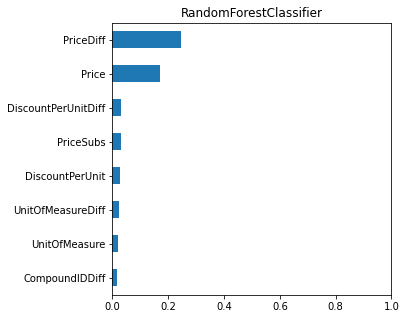

In [ ]:
df_result = pd.DataFrame()

clf_RF = RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=None, min_samples_split=20, ccp_alpha=0.0003, random_state=1234)
process_model(clf_RF, X_train, y_train, X_test, y_test, plot=True, threshold=0.015, note="n_estimators=200, criterion='entropy', max_depth=None, min_samples_split=20, ccp_alpha=0.0003, random_state=1234")

d(df_result)

fname = f'Shufersal_cans_result_{id}.csv'
df_result.to_csv(fname, index = True)

## Models - compare results

1. Diff
2. Diff with remove ingredients columns
6. OnlyPrices - Diff with only 3 features( Price, PriceSubs, PriceDiff)
7. Train on sweets, predict on cans

In [ ]:
def read_results(id='', disp=True, full=False):
  fname = f'Shufersal_cans_result_{id}.csv'
  p(fname)
  try:
    df = pd.read_csv(fname)
  except:
    try:
      df = pd.read_csv('/content/drive/MyDrive/Project4_Classification/' + fname)
    except:
      return
  df.set_index(['name', 'index'], inplace=True)
  if not full:
    df = df.loc[['RandomForestClassifier: Train', 'RandomForestClassifier: Test']]#.copy()
  if disp:
    pd.set_option("max_column", 120)
    d(df)
  return df

In [ ]:
p(id)
read_results()
read_results('remove ingredients')
read_results('only_prices')
read_results('train_sweet_pred_cans')
p()

train_sweet_pred_cans
Shufersal_cans_result_.csv


0        1  precision  recall  \
name                          index                                       
RandomForestClassifier: Train 0      8245.0   2395.0       0.89    0.77   
                              1       990.0  14908.0       0.86    0.94   
RandomForestClassifier: Test  0      3329.0   1237.0       0.86    0.73   
                              1       550.0   6258.0       0.83    0.92   

                                     f1-score  accuracy  support  \
name                          index                                
RandomForestClassifier: Train 0          0.83      0.87  10640.0   
                              1          0.90      0.87  15898.0   
RandomForestClassifier: Test  0          0.79      0.84   4566.0   
                              1          0.88      0.84   6808.0   

                                     precision_avg  recall_avg  f1-score_avg  \
name                          index                                            
RandomForestClassifier: Train 0               0.88        0.86          0.86   
                              1               0.88        0.86          0.86   
RandomForestClassifier: Test  0               0.85        0.82          0.83   
                              1               0.85        0.82          0.83   

                                                                                  note  
name                          index                                                     
RandomForestClassifier: Train 0      n_estimators=200, criterion='entropy', max_dep...  
                              1                                                    NaN  
RandomForestClassifier: Test  0      n_estimators=200, criterion='entropy', max_dep...  
                              1                                                    NaN

Shufersal_cans_result_remove ingredients.csv


0        1  precision  recall  \
name                          index                                       
RandomForestClassifier: Train 0      8238.0   2402.0       0.90    0.77   
                              1       926.0  14972.0       0.86    0.94   
RandomForestClassifier: Test  0      3321.0   1245.0       0.86    0.73   
                              1       524.0   6284.0       0.83    0.92   

                                     f1-score  accuracy  support  \
name                          index                                
RandomForestClassifier: Train 0          0.83      0.87  10640.0   
                              1          0.90      0.87  15898.0   
RandomForestClassifier: Test  0          0.79      0.84   4566.0   
                              1          0.88      0.84   6808.0   

                                     precision_avg  recall_avg  f1-score_avg  \
name                          index                                            
RandomForestClassifier: Train 0               0.88        0.86          0.87   
                              1               0.88        0.86          0.87   
RandomForestClassifier: Test  0               0.85        0.83          0.83   
                              1               0.85        0.83          0.83   

                                                                                  note  
name                          index                                                     
RandomForestClassifier: Train 0      n_estimators=200, criterion='entropy', max_dep...  
                              1                                                    NaN  
RandomForestClassifier: Test  0      n_estimators=200, criterion='entropy', max_dep...  
                              1                                                    NaN

Shufersal_cans_result_only_prices.csv


0        1  precision  recall  \
name                          index                                       
RandomForestClassifier: Train 0      7782.0   2858.0       0.79    0.73   
                              1      2060.0  13838.0       0.83    0.87   
RandomForestClassifier: Test  0      3260.0   1306.0       0.78    0.71   
                              1       938.0   5870.0       0.82    0.86   

                                     f1-score  accuracy  support  \
name                          index                                
RandomForestClassifier: Train 0          0.76      0.81  10640.0   
                              1          0.85      0.81  15898.0   
RandomForestClassifier: Test  0          0.74      0.80   4566.0   
                              1          0.84      0.80   6808.0   

                                     precision_avg  recall_avg  f1-score_avg  \
name                          index                                            
RandomForestClassifier: Train 0               0.81        0.80          0.80   
                              1               0.81        0.80          0.80   
RandomForestClassifier: Test  0               0.80        0.79          0.79   
                              1               0.80        0.79          0.79   

                                                                                  note  
name                          index                                                     
RandomForestClassifier: Train 0      n_estimators=200, criterion='entropy', max_dep...  
                              1                                                    NaN  
RandomForestClassifier: Test  0      n_estimators=200, criterion='entropy', max_dep...  
                              1                                                    NaN

Shufersal_cans_result_train_sweet_pred_cans.csv


0        1  precision  recall  \
name                          index                                        
RandomForestClassifier: Train 0      12719.0   5349.0       0.84    0.70   
                              1       2412.0  33980.0       0.86    0.93   
RandomForestClassifier: Test  0       9813.0   5393.0       0.67    0.65   
                              1       4873.0  17833.0       0.77    0.79   

                                     f1-score  accuracy  support  \
name                          index                                
RandomForestClassifier: Train 0          0.77      0.86  18068.0   
                              1          0.90      0.86  36392.0   
RandomForestClassifier: Test  0          0.66      0.73  15206.0   
                              1          0.78      0.73  22706.0   

                                     precision_avg  recall_avg  f1-score_avg  \
name                          index                                            
RandomForestClassifier: Train 0               0.85        0.82          0.83   
                              1               0.85        0.82          0.83   
RandomForestClassifier: Test  0               0.72        0.72          0.72   
                              1               0.72        0.72          0.72   

                                                                                  note  
name                          index                                                     
RandomForestClassifier: Train 0      n_estimators=200, criterion='entropy', max_dep...  
                              1                                                    NaN  
RandomForestClassifier: Test  0      n_estimators=200, criterion='entropy', max_dep...  
                              1                                                    NaN